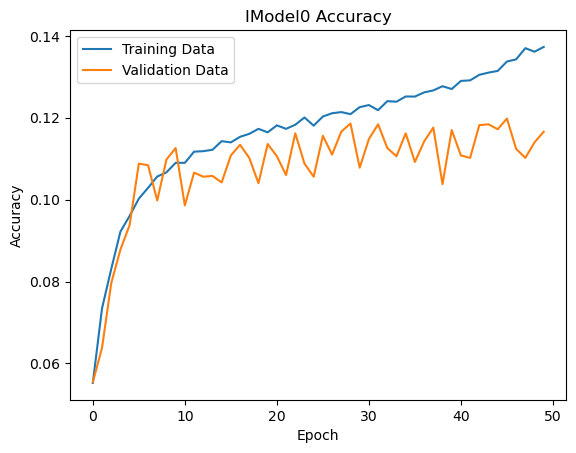

In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
history = pickle.load(open("IModels/IModel0/history.p", "rb"))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('IModel0 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left')
plt.savefig('png/IModel0 Accuracy.png')

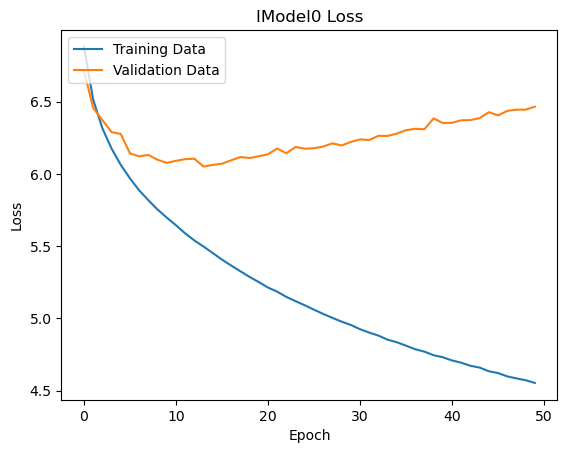

In [3]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('IModel0 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/IModel0 Loss.png')

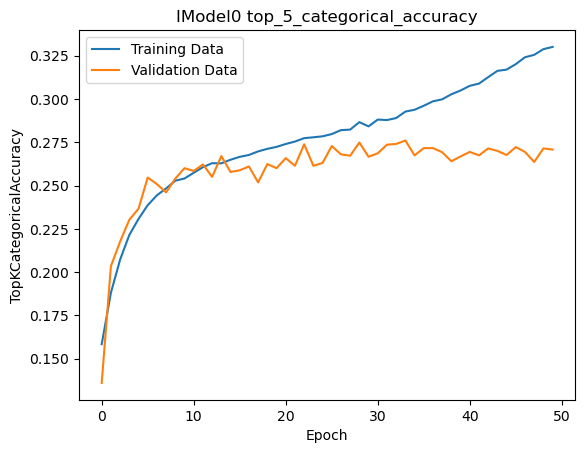

In [4]:
plt.plot(history['sparse_top_k_categorical_accuracy'])
plt.plot(history['val_sparse_top_k_categorical_accuracy'])
plt.title('IModel0 top_5_categorical_accuracy')
plt.ylabel('TopKCategoricalAccuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 
plt.savefig('png/IModel0 top_5_categorical_accuracy k=5.png')

In [8]:
# Activation Functions
def elliott_activation(x):
    return (0.5 * x / (1 + tf.abs(x))) + 0.5

def modified_elliott_activation(x):
    return (x / tf.sqrt(1 + tf.square(x))) + 0.5

# Registriere die benutzerdefinierten Metrikfunktionen
custom_objects = {'top_5_categorical_accuracy': top_5_categorical_accuracy,
                  'top_10_categorical_accuracy': top_10_categorical_accuracy,
                  'elliott_activation': elliott_activation,
                  'modified_elliott_activation': modified_elliott_activation}

mname = "IModel0"

# Lade das Modell mit den registrierten benutzerdefinierten Metriken
with tf.keras.utils.custom_object_scope(custom_objects):
    model = keras.models.load_model("IModels/"+mname+'/Model_100000.h5')

# Vorbereiten der Validierungsdaten
with open('FormatedData/E100000/x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)
    
with open('FormatedData/E100000/y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

# Vorhersagen des Modells für die Validierungsdaten
predictions = model.predict(x_val)

# Perplexität (Perplexity)
perplexity = np.exp(np.mean(-np.log(predictions[np.arange(len(y_val)), y_val])))
print("Perplexity:", perplexity)

157/157 [==============================] - 1s 6ms/step
Perplexity: 10121.188


In [10]:
models_to_show = [0]

for model_num in models_to_show:
    model = "IModels/IModel" + str(model_num)
    history = pickle.load(open(model + "/history.p", "rb"))

    print(model + ":")
    print("Last accuracy:", history['accuracy'][-1])
    print("Last val accuracy:", history['val_accuracy'][-1])
    print("Last Loss:", history['loss'][-1])
    print("Last val Loss:", history['val_loss'][-1])
    print("Last top_5_categorical_accuracy:", history['sparse_top_k_categorical_accuracy'][-1])
    print("Last val top_5_categorical_accuracy:", history['val_sparse_top_k_categorical_accuracy'][-1])

IModels/IModel0:
Last accuracy: 0.13730525970458984
Last val accuracy: 0.11659999936819077
Last Loss: 4.553531646728516
Last val Loss: 6.46433162689209
Last top_5_categorical_accuracy: 0.3300315737724304
Last val top_5_categorical_accuracy: 0.27079999446868896
